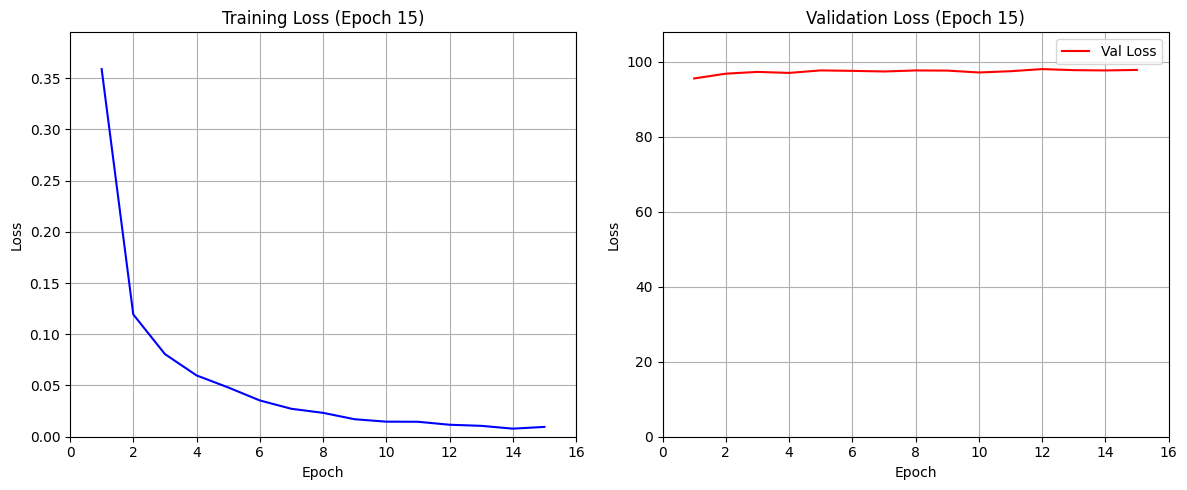

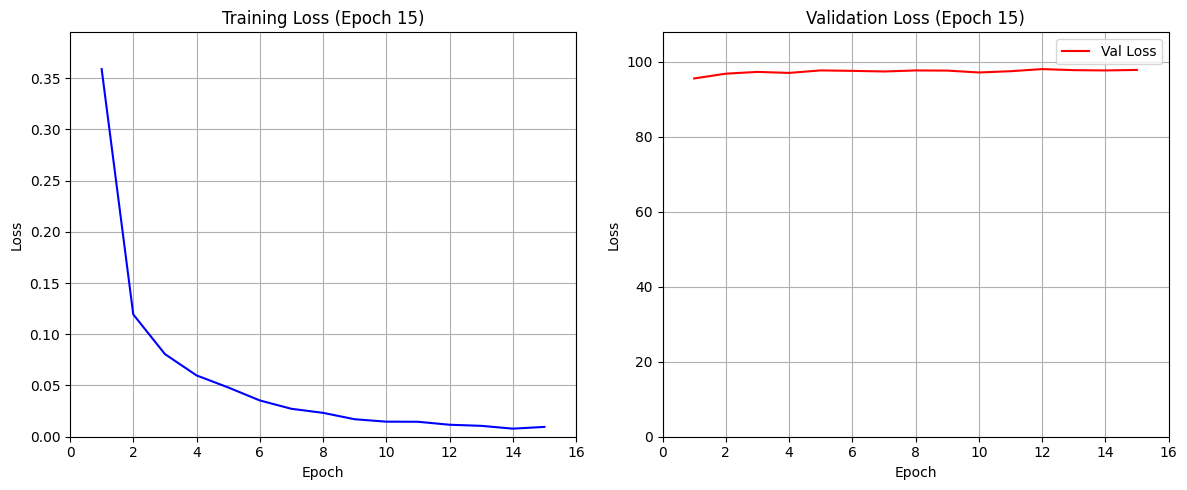

In [1]:
import torch
import torch.nn as nn
from torchvision.datasets import MNIST
from torchvision import transforms
from myocr.config import MODEL_PATH
from myocr.modeling.model import ModelZoo
from myocr.training.base import Trainer
from torch.optim import Adam

model = ModelZoo.load_model("custom", "../modeling/configs/mlp.yaml", "cuda:0" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])

train_dataset = MNIST(root=f'{MODEL_PATH}/data', train=True, download=True, transform=transform)
val_dataset = MNIST(root=f'{MODEL_PATH}/data', train=False, download=True, transform=transform)
print(model.loaded_model)
trainer = Trainer(model,[], nn.CrossEntropyLoss(), optimizer=Adam(model.parameters(), lr=1e-3), num_epochs=15, batch_size = 500)
trainer.fit(train_dataset, val_dataset)
# model.to_onnx(f"{MODEL_PATH}/mlp.onnx" , torch.randn(1,28*28, dtype=torch.float32).to("cuda:0"))
